# COMPSCI 389: Introduction to Machine Learning
## Pandas and Data Sets

This notebook provides an introduction to data analysis in Python using the `pandas` library. The topics covered in this notebook will be a foundation upon which we will build as we learn about and apply machine learning algorithms.

## Data Analysis

**Data analysis** is the process of inspecting, cleaning, transforming, and modeling data to extract useful insights, identify patters, and support decision-making.

Machine learning relies on data, and the first step is to obtain, inspect, and clean the data in preparation for its use with machine learning algorithms. This notebook covers some basic data analysis topics, and shows how standard libraries like pandas make data analysis easy.

## What is pandas?

Pandas stands for "PANel DAta," an econometric term for data sets. Webpage: [link](https://pandas.pydata.org/docs/index.html).

It provides two main objects: a **DataFrame** and a **Series**.

A DataFrame object stores a 2-dimensional table of data, while a Series stores a 1-dimensional vector of data.

Pandas provides useful functions for working with these objects including functions for:
1. Loading data sets from files and storing them in DataFrame and/or Series objects.
2. Manipulating DataFrame and Series objects (e.g., adding or removing features).
3. Computing statistics of the data (e.g., the minimum and maximum values of features).

Pandas has become so common that many other ML libraries in python are built to be compatible with pandas, as we will see below.

To install pandas, run the following command in the console or command line:

> pip install pandas

## Example Data Sets

In the remainder of this notebook be load and inspect a few example data sets for supervised learning.

## GPA Data

The GPA data set contains data about undergraduate students from the *Universidade Federal do Rio Grande do Sul* (UFRGS) in Brazil.

**Input**: Scores on 9 entrance exams: 
1. Physics
2. Biology
3. History
4. English
5. Geography
6. Literature
7. Portuguese
8. Math
9. Chemistry

**Output**: GPA on a 4.0 scale during the first three semesters at university.
 - The GPA can be used for regression (predict the GPA) or classification (predict the GPA range, e.g., whether it is at least 3.0).

**Data set Size**: 43,303

Let's start by loading and displaying this data set. The data set is available here:

[https://people.cs.umass.edu/~pthomas/courses/COMPSCI_389/GPA.csv](https://people.cs.umass.edu/~pthomas/courses/COMPSCI_389/GPA.csv)

You can download it and place it inside a directory called `data`, next to this .ipynb file, and can load the data set from this local copy, or you can directly load it from the online posting:

In [5]:
import pandas as pd                             # Import pandas

# Load the data set directly from the online link, assuming numbers are separated by commas
df = pd.read_csv("https://people.cs.umass.edu/~pthomas/courses/COMPSCI_389/GPA.csv", delimiter=',') # Read GPA.csv, assuming numbers are separated by commas

# Load the data set from a local `data` directory, assuming numbers are separated by commas
# df = pd.read_csv("data/GPA.csv", delimiter=',')

print(df)                                       # Prints a string representation of the DataFrame
display(df)                                     # Renders an HTML table (for Jupyter Notebooks - don't use in .py file)

       physics  biology  history  English  geography  literature  Portuguese  \
0       622.60   491.56   439.93   707.64     663.65      557.09      711.37   
1       538.00   490.58   406.59   529.05     532.28      447.23      527.58   
2       455.18   440.00   570.86   417.54     453.53      425.87      475.63   
3       756.91   679.62   531.28   583.63     534.42      521.40      592.41   
4       584.54   649.84   637.43   609.06     670.46      515.38      572.52   
...        ...      ...      ...      ...        ...         ...         ...   
43298   519.55   622.20   660.90   543.48     643.05      579.90      584.80   
43299   816.39   851.95   732.39   621.63     810.68      666.79      705.22   
43300   798.75   817.58   731.98   648.42     751.30      648.67      662.05   
43301   527.66   443.82   545.88   624.18     420.25      676.80      583.41   
43302   512.56   415.41   517.36   532.37     592.30      382.20      538.35   

         math  chemistry      gpa  
0  

,physics,biology,history,English,geography,literature,Portuguese,math,chemistry,gpa
0,622.60,491.56,439.93,707.64,663.65,557.09,711.37,731.31,509.80,1.33333
1,538.00,490.58,406.59,529.05,532.28,447.23,527.58,379.14,488.64,2.98333
2,455.18,440.00,570.86,417.54,453.53,425.87,475.63,476.11,407.15,1.97333
3,756.91,679.62,531.28,583.63,534.42,521.40,592.41,783.76,588.26,2.53333
4,584.54,649.84,637.43,609.06,670.46,515.38,572.52,581.25,529.04,1.58667
...,...,...,...,...,...,...,...,...,...,...
43298,519.55,622.20,660.90,543.48,643.05,579.90,584.80,581.25,573.92,2.76333
43299,816.39,851.95,732.39,621.63,810.68,666.79,705.22,781.01,831.76,3.81667
43300,798.75,817.58,731.98,648.42,751.30,648.67,662.05,773.15,835.25,3.75000
43301,527.66,443.82,545.88,624.18,420.25,676.80,583.41,395.46,509.80,2.50000


**Question**: Is each column numerical, categorical, text, or an image? Continuous, discrete, nominal, or ordinal?

**Answer**: All of these columns are numerical and continuous.

**Question**: If the GPAs were binned into letter grades A, B, C, ..., F, would they be numerical, categorical, text, or an image? Continuous, discrete, nominal, or ordinal?

**Answer**: In this case the GPAs would be categorical, and specifically ordinal.

Notice that pandas views this as a table with rows and columns. Hence features *and* labels are viewed as "columns" when using pandas.

## Manipulating DataFrames

In this section we give some examples of how DataFrames can be used to compute statistics of data and how DataFrames can be manipulated.

First, let's use the `iloc` (integer-location based indexing for selection by position) function in pandas to split the dataset into the input features $X$ and the targets/labels $y$. 

In [6]:
element = df.iloc[3,7]              # Get one element using iloc
print(type(element))                # Confirm it is a numpy.float64
firstThreeRows = df.iloc[0:3, :]    # Get the first three rows
print(type(firstThreeRows))         # Confirm it is a new DataFrame

X = df.iloc[:, :-1] # All columns except the last as features. This creates a new DataFrame X.
print(type(X))      # Confirm that this is actually a new DataFrame by printing the type of X.
y = df.iloc[:, -1]  # The last column contains the labels. This creates a new Series (like a 1-dimensional DataFrame) y
print(type(y))      # Show that getting a vector returns a Series
display(X)          # Display the input columns
display(y)          # Display the output (label) column

<class 'numpy.float64'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


,physics,biology,history,English,geography,literature,Portuguese,math,chemistry
0,622.60,491.56,439.93,707.64,663.65,557.09,711.37,731.31,509.80
1,538.00,490.58,406.59,529.05,532.28,447.23,527.58,379.14,488.64
2,455.18,440.00,570.86,417.54,453.53,425.87,475.63,476.11,407.15
3,756.91,679.62,531.28,583.63,534.42,521.40,592.41,783.76,588.26
4,584.54,649.84,637.43,609.06,670.46,515.38,572.52,581.25,529.04
...,...,...,...,...,...,...,...,...,...
43298,519.55,622.20,660.90,543.48,643.05,579.90,584.80,581.25,573.92
43299,816.39,851.95,732.39,621.63,810.68,666.79,705.22,781.01,831.76
43300,798.75,817.58,731.98,648.42,751.30,648.67,662.05,773.15,835.25
43301,527.66,443.82,545.88,624.18,420.25,676.80,583.41,395.46,509.80


0        1.33333
1        2.98333
2        1.97333
3        2.53333
4        1.58667
          ...   
43298    2.76333
43299    3.81667
43300    3.75000
43301    2.50000
43302    3.16667
Name: gpa, Length: 43303, dtype: float64

Notice that the variable `y` displays differently from `X`. This is because `y` is a Series (1-dimensional vector), while `X` is a DataFrame (2-dimensional matrix/table).

Also, in the output of the above block, `float64` means that each element in the `y` Series is a floating point number represented with 64 bits.

We can reference parts of the DataFrame using `iloc` (like indexing a typical vector or matrix with integers), and we can also reference columns by their names. If we assign values to a column with a name not in the data set, a column will be added with the provided name:

In [7]:
display(df['physics'])  # Show that we can query a column using ['column name'] if the column name is already in the table.
# display(df['hotdog']) # If you try to query a column that doesn't exist, it produces an error. Uncomment this line to see the error.
df['STEM Total'] = df['physics'] + df['biology'] + df['math'] + df['chemistry'];                                # Add a column to the data frame by using ['column name'] with a name that isn't already in the table.
df['Non-STEM Total'] = df['history'] + df['English'] + df['geography'] + df['literature'] + df['Portuguese'];   # Add another column.
display(df);

0        622.60
1        538.00
2        455.18
3        756.91
4        584.54
          ...  
43298    519.55
43299    816.39
43300    798.75
43301    527.66
43302    512.56
Name: physics, Length: 43303, dtype: float64

,physics,biology,history,English,geography,literature,Portuguese,math,chemistry,gpa,STEM Total,Non-STEM Total
0,622.60,491.56,439.93,707.64,663.65,557.09,711.37,731.31,509.80,1.33333,2355.27,3079.68
1,538.00,490.58,406.59,529.05,532.28,447.23,527.58,379.14,488.64,2.98333,1896.36,2442.73
2,455.18,440.00,570.86,417.54,453.53,425.87,475.63,476.11,407.15,1.97333,1778.44,2343.43
3,756.91,679.62,531.28,583.63,534.42,521.40,592.41,783.76,588.26,2.53333,2808.55,2763.14
4,584.54,649.84,637.43,609.06,670.46,515.38,572.52,581.25,529.04,1.58667,2344.67,3004.85
...,...,...,...,...,...,...,...,...,...,...,...,...
43298,519.55,622.20,660.90,543.48,643.05,579.90,584.80,581.25,573.92,2.76333,2296.92,3012.13
43299,816.39,851.95,732.39,621.63,810.68,666.79,705.22,781.01,831.76,3.81667,3281.11,3536.71
43300,798.75,817.58,731.98,648.42,751.30,648.67,662.05,773.15,835.25,3.75000,3224.73,3442.42
43301,527.66,443.82,545.88,624.18,420.25,676.80,583.41,395.46,509.80,2.50000,1876.74,2850.52


Yikes! Now the label is in the middle of the DataFrame. Let's move it to the end. This isn't really necessary, but it provides an example of how other features of DataFrames can be used.

In [8]:
df['gpa'] = df.pop('gpa');  # pop removes the 'gpa' column and returns it, and df['gpa'] adds a new column called gpa.
display(df)

,physics,biology,history,English,geography,literature,Portuguese,math,chemistry,STEM Total,Non-STEM Total,gpa
0,622.60,491.56,439.93,707.64,663.65,557.09,711.37,731.31,509.80,2355.27,3079.68,1.33333
1,538.00,490.58,406.59,529.05,532.28,447.23,527.58,379.14,488.64,1896.36,2442.73,2.98333
2,455.18,440.00,570.86,417.54,453.53,425.87,475.63,476.11,407.15,1778.44,2343.43,1.97333
3,756.91,679.62,531.28,583.63,534.42,521.40,592.41,783.76,588.26,2808.55,2763.14,2.53333
4,584.54,649.84,637.43,609.06,670.46,515.38,572.52,581.25,529.04,2344.67,3004.85,1.58667
...,...,...,...,...,...,...,...,...,...,...,...,...
43298,519.55,622.20,660.90,543.48,643.05,579.90,584.80,581.25,573.92,2296.92,3012.13,2.76333
43299,816.39,851.95,732.39,621.63,810.68,666.79,705.22,781.01,831.76,3281.11,3536.71,3.81667
43300,798.75,817.58,731.98,648.42,751.30,648.67,662.05,773.15,835.25,3224.73,3442.42,3.75000
43301,527.66,443.82,545.88,624.18,420.25,676.80,583.41,395.46,509.80,1876.74,2850.52,2.50000


Another useful function is `df.describe()`, which computes "descriptive statistics" of the DataFrame and stores them in a new DataFrame object:

In [9]:
# Call the describe() function and display the resulting DataFrame
display(df.describe())

# Flip the rows and columns by calling .T (transpose):
print("Notice how .T (transpose) flips the rows and columns. Here is df.describe().T:");
display(df.describe().T);

,physics,biology,history,English,geography,literature,Portuguese,math,chemistry,STEM Total,Non-STEM Total,gpa
count,43303.000000,43303.000000,43303.000000,43303.000000,43303.000000,43303.000000,43303.000000,43303.000000,43303.000000,43303.000000,43303.000000,43303.000000
mean,576.122666,568.660142,580.826884,573.993046,574.494550,583.302079,551.041012,579.195005,571.711380,2295.689193,2863.657572,2.785727
std,115.153301,101.443621,94.214466,86.872201,90.757127,92.895977,87.149764,114.682663,112.170338,382.953878,328.000253,0.820757
min,299.340000,262.990000,265.020000,222.710000,224.870000,239.110000,151.590000,297.990000,300.470000,1439.800000,1840.050000,0.000000
25%,482.790000,492.400000,516.100000,517.700000,510.230000,516.770000,491.880000,489.410000,484.540000,1986.405000,2640.610000,2.280000
50%,565.610000,566.440000,578.940000,580.280000,575.470000,587.070000,553.570000,571.890000,565.510000,2263.720000,2865.600000,2.920000
75%,662.800000,634.780000,650.190000,640.560000,637.270000,648.670000,613.060000,665.160000,655.420000,2562.520000,3087.245000,3.430000
max,952.090000,966.570000,925.760000,858.440000,941.840000,904.770000,825.530000,1072.120000,1001.900000,3700.080000,3891.230000,4.000000


Notice how .T (transpose) flips the rows and columns. Here is df.describe().T:


,count,mean,std,min,25%,50%,75%,max
physics,43303.0,576.122666,115.153301,299.34,482.790,565.61,662.800,952.09
biology,43303.0,568.660142,101.443621,262.99,492.400,566.44,634.780,966.57
history,43303.0,580.826884,94.214466,265.02,516.100,578.94,650.190,925.76
English,43303.0,573.993046,86.872201,222.71,517.700,580.28,640.560,858.44
geography,43303.0,574.494550,90.757127,224.87,510.230,575.47,637.270,941.84
literature,43303.0,583.302079,92.895977,239.11,516.770,587.07,648.670,904.77
Portuguese,43303.0,551.041012,87.149764,151.59,491.880,553.57,613.060,825.53
math,43303.0,579.195005,114.682663,297.99,489.410,571.89,665.160,1072.12
chemistry,43303.0,571.711380,112.170338,300.47,484.540,565.51,655.420,1001.90
STEM Total,43303.0,2295.689193,382.953878,1439.80,1986.405,2263.72,2562.520,3700.08


Next, let's add a few more terms to the description:
1. The sample variance of the terms in the column. This captures how much the samples vary around the mean.
2. The standard deviation of the terms in the column. This is the square root of the variance.
3. Let's only print some of the columns, like to 50% quantile (median), but not the 25% or 75% quantiles.

In [10]:
# Add additional statistics like the variance and skewness:
statistics = df.describe().T;
statistics['variance'] = df.var()                           # Get the variance of each column
statistics['skew'] = df.skew()                              # Get the skew of each column

# Notice that we can select multiple columns from a DataFrame using [['column 1 name', 'column 2 name']]
display(statistics[['mean', '50%', 'variance', 'skew']])    # Display a subset of the statistics. "50%" is the median

,mean,50%,variance,skew
physics,576.122666,565.61,13260.282681,0.385449
biology,568.660142,566.44,10290.808255,0.294475
history,580.826884,578.94,8876.365696,0.016084
English,573.993046,580.28,7546.779298,-0.258281
geography,574.494550,575.47,8236.856029,-0.017728
literature,583.302079,587.07,8629.662535,-0.111834
Portuguese,551.041012,553.57,7595.081410,-0.160546
math,579.195005,571.89,13152.113255,0.304221
chemistry,571.711380,565.51,12582.184723,0.358615
STEM Total,2295.689193,2263.72,146653.672883,0.394239


Next, let's perform more basic data analysis, plotting some statistics of the data.

We'll start with a histogram of the GPAs, showing the distribution of GPAs in the data.

For this we will use matplotlib, a library for making plots in python. If you haven't already installed matplot lib, you can install it by running:
> pip install matplotlib

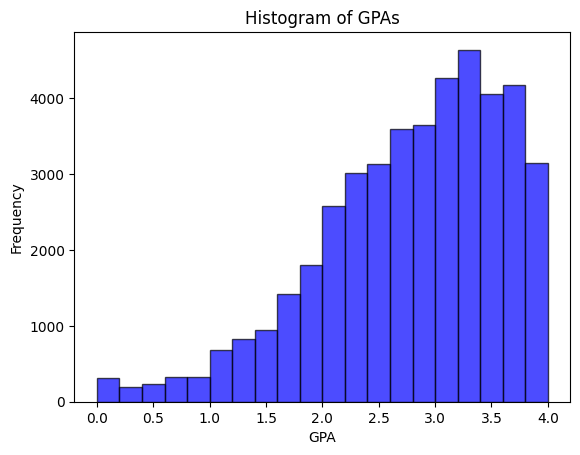

In [11]:
import matplotlib.pyplot as plt

plt.hist(df['gpa'], bins=20, color='blue', edgecolor='black', alpha=0.7)    # Create a histogram of the gpa column. Matplotlib is compatible with pandas, so we can pass the Series object df['gpa'].
plt.title('Histogram of GPAs')                                              # Add a title
plt.xlabel('GPA')                                                           # Add a horizontal label
plt.ylabel('Frequency')                                                     # Add a veritcal label
plt.show()                                                                  # Show the plot

DataFrames also have a `.plot` accessor for columns that provide wrappers for matplotlib plotting functions. Reference page: [link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html). We can recreate this plot using the .plot accessor as follows:

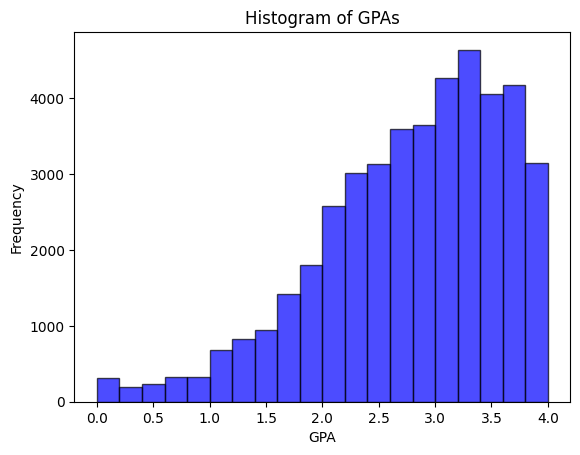

In [12]:
df['gpa'].plot(kind='hist', bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram of GPAs')                          # Add a title
plt.xlabel('GPA')                                       # Add a horizontal label
plt.ylabel('Frequency')                                 # Add a veritcal label
plt.show()                                              # Show the plot

We could also make a density plot (plotting the empirical probability density function):

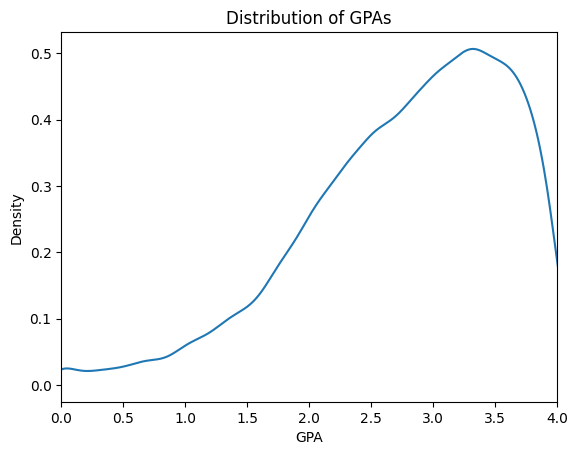

In [13]:
df['gpa'].plot(kind='density')
plt.title('Distribution of GPAs')   # Add a title
plt.xlabel('GPA')                   # Add a horizontal label
plt.xlim(0, 4.0)                    # Set the x-axis limit
plt.ylabel('Density')               # Add a veritcal label
plt.show()                          # Show the plot

You can find additional documentation on plotting DataFrames [here](https://pandas.pydata.org/docs/user_guide/visualization.html).

Next, let's plot some of the different columns.

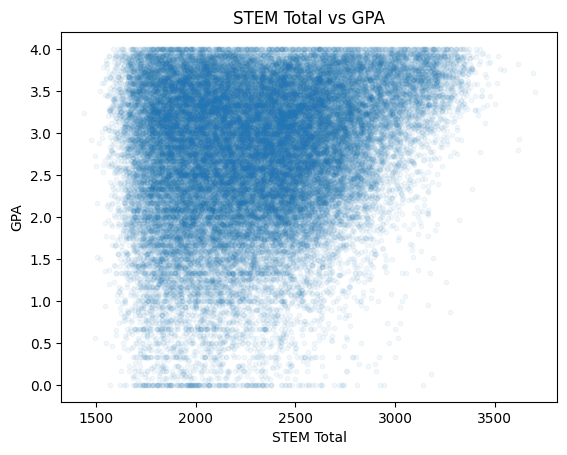

In [14]:
# Plot STEM Total versus GPA
plt.scatter(df['STEM Total'], df['gpa'], s=10, alpha=0.05)      # Creating the scatter plot of the STEM total versus GPA. Here 's' is the size of the dots and `alpha` is the transparency.
plt.title('STEM Total vs GPA')                                  # Give the plot a title
plt.xlabel('STEM Total')                                        # Label the horizontal axis
plt.ylabel('GPA')                                               # Label the vertical axis
plt.show()                                                      # Show the plot

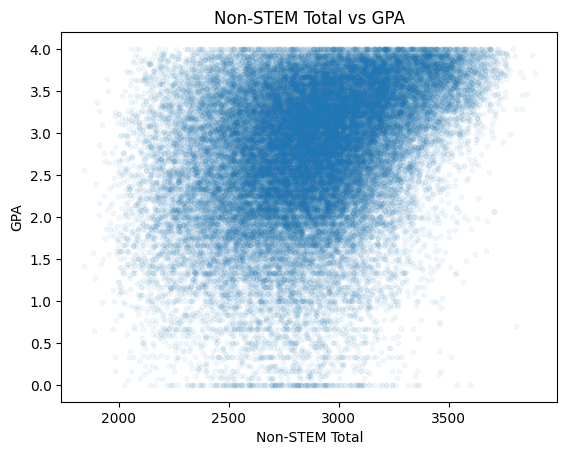

In [15]:
# Plot Non-STEM Total versus GPA
plt.scatter(df['Non-STEM Total'], df['gpa'], s=10, alpha=0.05)  # Creating the scatter plot of the STEM total versus GPA. Here 's' is the size of the dots and `alpha` is the transparency.
plt.title('Non-STEM Total vs GPA')                              # Give the plot a title
plt.xlabel('Non-STEM Total')                                    # Label the horizontal axis
plt.ylabel('GPA')                                               # Label the vertical axis
plt.show()                                                      # Show the plot

Interesting! It's hard to tell which is more correlated with GPA, the scores on the STEM or non-STEM exams. Let's use other statistical functions of DataFrame objects to put numbers to this.

To be more precise, *correlation* can refer to many different statistics that describe the relationship between two quantities. When we say correlation we mean the **Pearson correlation coefficient** [[wikipedia]](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient). This is a number that quantifies how correlated two quantities are, with 0 meaning that they are not correlated, and both positive or negative numbers meaning that they are correlated. 
- Positive correlations mean that when one quantity is bigger, the other tends to be bigger as well.
- Negative correlations mean that when one quanitty is bigger, the other tends to be smaller as well.
- Zero correlation means that knowing one quantity doesn't tell you how big or small the other will be.
- The correlation is always in the range $[-1,1]$.

Here are some examples, where the correlation coefficient for several 2-dimensional points is written above a plot of the points:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1920px-Correlation_examples2.svg.png" alt="Wikipedia example figure for Pearson correlation coefficient." width="60%"/>

You do **not** need to memorize the following equation, but you should be familiar with it. The Pearson correlation coefficient is given by (the following comes from the Wikipedia page [here](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient#For_a_population)):
$$ \rho_{X,Y} = \frac{\mathbf{E}\left [ (X-\mu_X)(Y-\mu_Y)\right ]}{\sigma_X \sigma_Y},$$
where
- $\sigma_X$ and $\sigma_Y$ are the standard deviations of $X$ and $Y$.
- $\mu_X$ and $\mu_Y$ are the means of $X$ and $Y$.

We usually do not know the exact mean or standard deviation of $X$ or $Y$, and so we estimate these terms from samples. The sample Pearson correlation coefficient is thus:
$$
r_{x,y}=\frac{\sum_{i=1}^n(x_i-\bar x)(y_i-\bar y)}{\sqrt{\sum_{i=1}^n(x_i-\bar x)^2}\sqrt{\sum_{i=1}^n(y_i-\bar y)^2}},
$$
where
- $n$ is the sample size
- $(x_i,y_i)$ are the individual sample points, indexed with $i$
- $\bar x$ and $\bar y$ are the sample means: $\bar x = \frac{1}{n}\sum_{i=1}^n x_i$ and $\bar y = \frac{1}{n}\sum_{i=1}^n y_i$.

Let's compute the correlation coefficients to measure whether, in this data set, STEM or Non-STEM exams have a higher correlation with GPA. We will use the `corr()` function, which computes the sample pairwaise Pearson correlation coefficient of two columns. 

In [16]:
stem_gpa_correlation = df['STEM Total'].corr(df['gpa'])                             # Compute the pairwise correlation of the two columns: STEM Total and gpa.
non_stem_gpa_correlation = df['Non-STEM Total'].corr(df['gpa'])                     # Compute the pairwise correlation of the two columns: Non-STEM Total and gpa.

# Print the two correlations
print(f"Correlation between STEM Total and GPA: {stem_gpa_correlation}")
print(f"Correlation between Non-STEM Total and GPA: {non_stem_gpa_correlation}")

Correlation between STEM Total and GPA: 0.21260938426832177
Correlation between Non-STEM Total and GPA: 0.3312547367642785


Interesting! Let's look at this more by computing the correlation between all pairs of columns. We have 12 columns, which means that there are $12 \times 12 = 144$ pairs of columns. That's too many numbers to read in a list, so let's store them in a matrix. This is called a **correlation matrix**. While matplotlib is great for general plotting in python, the seaborn package provides more tools for statistical data visualization. If you don't already have seaborn installed, run:
> pip install seaborn

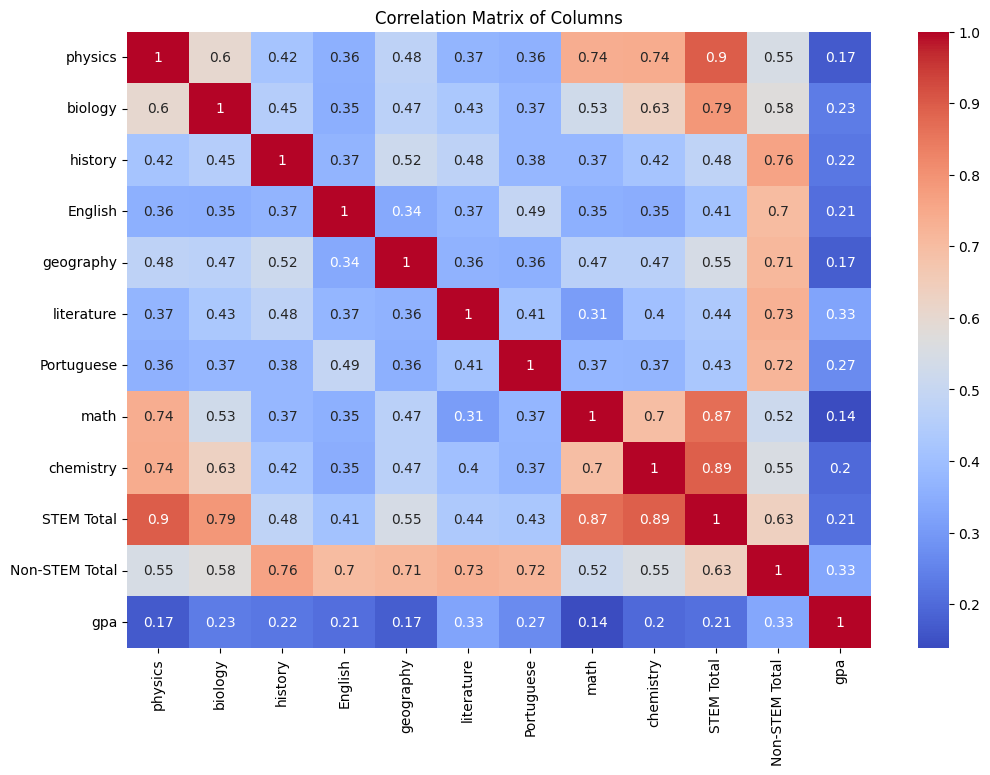

In [18]:
import seaborn as sns                                           # We use seaborn to plot the correlation matrix as a heatmap

correlation_matrix = df.corr()                                  # Calling corr() with no arguments defaults to Pearson's correlation coefficient

# Plot the correlation matrix
plt.figure(figsize=(12, 8))                                     # Create a plot that is 12" by 8"
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')    # Draw the correlation matrix as a heatmap using seaborn. "annot" sets whether numbers are drawn. "cmap" sets the color meanings
plt.title('Correlation Matrix of Columns')                      # Add a title to the plot
plt.show()                                                      # Display the plot

**Question**: Which columns have the highest correlation with GPA? Is this surprising?

**Question**: Why is the correlation between physics and STEM Total so high?

**Question**: Why do you think the correlation between physics and STEM Total is higher than the correlation between math and STEM Total, and what does this mean?

**Question**: Which columns have the lowest correlation? Is this surprising?

Recall that Non-STEM had a higher correlation with GPA than STEM ($0.33$ versus $0.21$). This means that having a higher non-STEM total is more likely to mean that you will have a higher GPA, but it does not say anything about how *much* higher GPAs will be when someone has a higher score on Non-STEM exams (in the example figure for Pearson's correlation coefficient, notice that the slope of lines doesn't change the correlation). Let's use some other features of DataFrames to study this:

Average GPA for high STEM scorers: 2.906325636524872
Average GPA for low STEM scorers: 2.6651347056253463
Average GPA for high Non-STEM scorers: 2.996511625250566
Average GPA for low Non-STEM scorers: 2.574952882149455


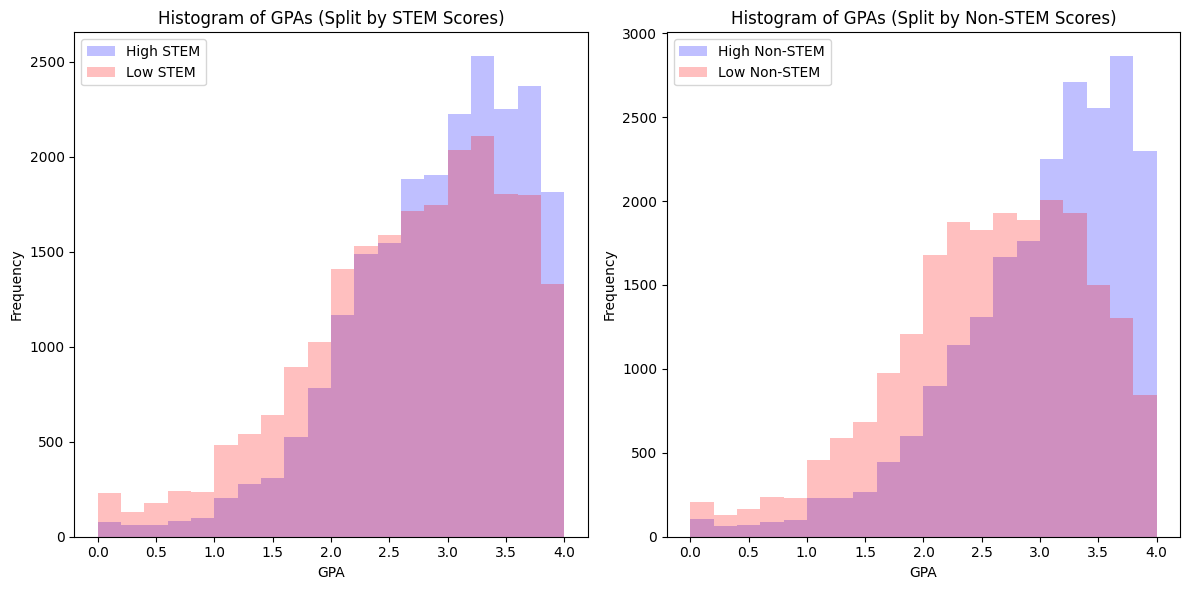

In [14]:
high_stem = df[df['STEM Total'] > df['STEM Total'].median()]            # Create a DataFrame holding only the rows with above-median STEM Totals. Notice that we can use Boolean indexing to do this.
low_stem = df[df['STEM Total'] <= df['STEM Total'].median()]            # Create a DataFrame holding only the rows with median-or-below STEM Totals

high_nonstem = df[df['Non-STEM Total'] > df['Non-STEM Total'].median()] # Create a DataFrame holding only the rows with above-median non-STEM Totals
low_nonstem = df[df['Non-STEM Total'] <= df['Non-STEM Total'].median()] # Create a DataFrame holding only the rows with median-or-below non-STEM Totals

# Print the average GPAs for each group
print("Average GPA for high STEM scorers:", high_stem['gpa'].mean())
print("Average GPA for low STEM scorers:", low_stem['gpa'].mean())
print("Average GPA for high Non-STEM scorers:", high_nonstem['gpa'].mean())
print("Average GPA for low Non-STEM scorers:", low_nonstem['gpa'].mean())

# Create histograms of the GPAs of the different groups
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))             # Set up two side by side figures within a 12" by 6" figure

# Plot for STEM
axes[0].hist(high_stem['gpa'], bins=20, color='blue', alpha=0.25, label='High STEM')
axes[0].hist(low_stem['gpa'], bins=20, color='red', alpha=0.25, label='Low STEM')
axes[0].set_title('Histogram of GPAs (Split by STEM Scores)')
axes[0].set_xlabel('GPA')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Plot for Non-STEM
axes[1].hist(high_nonstem['gpa'], bins=20, color='blue', alpha=0.25, label='High Non-STEM')
axes[1].hist(low_nonstem['gpa'], bins=20, color='red', alpha=0.25, label='Low Non-STEM')
axes[1].set_title('Histogram of GPAs (Split by Non-STEM Scores)')
axes[1].set_xlabel('GPA')
axes[1].set_ylabel('Frequency')
axes[1].legend()

# Display the plots
plt.tight_layout()  # In a Jupyter notebook, this removes some extra space around the plots
plt.show()

Interesting! It seems like scores on non-STEM exams generally provide a much better predictor of GPA than scores on STEM exams.

However, as we'll discuss later in the course, it's important to consider the full context of the problem when conducting data analysis like this. For example, do students with higher or lower scores on different exams have higher or lower tendencies to take courses that have higher variance in the grades that they give? Is GPA something we should even be predicting in the first place? Are there other serious social considers to consider when predicting something like GPA? We'll discuss this more later!

## Fisher's Iris Data Set

The **Iris data set** is a classic dataset introduced by the British statistician and biologist Ronald Fisher in 1936. The dataset is often used for testing classification algorithms.

### Data Set Overview

The data set consists of 150 samples from three species of Iris flowers (Iris setosa, Iris virginica, and Iris versicolor). Each sample includes four features: the length and the width of the sepals and petals, in centimeters (see the yellow "perianth" section of the figure below). Based on these features, the goal is to distinguish the species from each other.

<div style="background-color: white;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/7f/Mature_flower_diagram.svg/1920px-Mature_flower_diagram.svg.png" alt="Wikipedia diagram of flower parts." width="40%"/>
</div>


### Attributes

1. **Sepal Length**: The length of the sepal (in cm).
2. **Sepal Width**: The width of the sepal (in cm).
3. **Petal Length**: The length of the petal (in cm).
4. **Petal Width**: The width of the petal (in cm).
5. **Species**: The species of the flower (Setosa, Versicolor, Virginica).


### Note

A small number of common data sets are included within scikit-learn (a common ML library for python: [link](https://scikit-learn.org/stable/)), including the Iris data set. Hence, we will load this data set directly from scikit-learn.

If you don't already have scikit-learn installed, run:
> pip install scikit-learn

We do this using the DataFrame constructor that takes the raw data as input, as well as the column names.


In [15]:
from sklearn.datasets import load_iris                                      # Import the load_iris function from scikit-learn

iris = load_iris()                                                          # Load the data from scikit learn. Here, iris is *not* a DataFrame.
df = pd.DataFrame(iris.data, columns=iris.feature_names)                    # Convert iris inputs into a pandas DataFrame using the DataFrame constructor
df['species'] = iris.target                                                 # Add a column with the species
display(df);

# We could have instead viewed the species by their names:
df = pd.DataFrame(iris.data, columns=iris.feature_names)                    # Convert iris inputs into a pandas DataFrame as before
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)   # Add a column with the species names, replacing the encoded target values with their names
display(df);

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


**Question**: Is each column numerical, categorical, text, or an image? Continuous, discrete, nominal, or ordinal?

## Adult Data Set

The **Adult data set**, also known as the "Census Income" data set, is a another popular classification data set. Whereas Iris is particularly simple and often used only for learning, testing, and examples, the Adult data set is often used in ML research papers.

This data set is part of the [UCI machine learning repository](https://archive.ics.uci.edu/), which contains 664 different data sets that you can browse. [OpenML](https://www.openml.org/) is a platform that hosts many data sets, *including* many from the UCI ML repository. Scikit-learn provides functions for loading data sets from OpenML, which can be used to load the Adult data set. Note that you could also find and download the data set directly and load it from your machine locally. These loading functions don't require you to send the data set with your code, but do cause your programs to download them (at least once) when your code is run.

### Data Set Overview

The Adult data set is extracted from the 1994 Census database of the United States. It is commonly used for predicting whether an individual's income exceeds $50,000 per year based on census data. This task is framed as a binary classification problem.

### Features

The data set contains 14 attributes, including:

1. **Age**: The age of the individual.
2. **Workclass**: The type of employer the individual has (e.g., private, federal-gov).
3. **fnlwgt**: Final weight. The number of people the census believes the entry represents. E.g., a value of 50 means that the person's data represents 50 people in the real population with similar attributes. Individual people can be represented by multiple rows, so `fnlwgt` does not sum to the US population. This "binning" of people helps to preserve privacy.
4. **Education**: The highest level of education achieved by the individual.
5. **Education-Num**: The highest level of education in numerical form.
6. **Marital Status**: Marital status of the individual.
7. **Occupation**: The individual's occupation.
8. **Relationship**: The individual's role in the family.
9. **Race**: The race of the individual.
10. **Sex**: The gender of the individual.
11. **Capital Gain**: Income from investment sources, apart from wages/salary.
12. **Capital Loss**: Losses from investment sources, apart from wages/salary.
13. **Hours per Week**: Number of hours worked per week.
14. **Native Country**: Country of origin for the individual.

### Target Variable

- **Income**: Whether the individual earns more than $50,000 per year.


In [16]:
from sklearn.datasets import fetch_openml                                       # OpenML contains many useful data sets, including Adult.

adult = fetch_openml(name='adult', version=2, as_frame=True, parser='auto')     # Fetch the Adult dataset. as_frame=True indicates that we're using pandas and makes adult.data a DataFrame (among other changes)
df = adult.data                                                                 # Pull off the DataFrame, as we will manipulate it to append the labels
df['income'] = adult.target                                                     # Add the target column (what we aim to predict)
display(df)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Notice that both OpenML and scikit-learn returned data sets with the features (data) separate from the labels (target). In both cases we combined these into one DataFrame. Later when using data for ML, we will often split the features from the labels (storing them separately), and so this combination into a single table could be skipped. Right now we are combining them into one DataFrame just to better visualize the data sets.

**Question**: Is each column numerical, categorical, text, or an image? Continuous, discrete, nominal, or ordinal?

A DataFrame object stores information about the type of each column in `DataFrame.dtype`:

In [17]:
# We can get the types of columns using .dtype. This is a type object, not a string.
print('Second column .dtype is:');
print('\tType: ', type(df['workclass'].dtype))
print('\tValue: ', df['workclass'].dtype)

# We can get the string representation of the type with dtype.name. 
# This is useful when we want to compare the type to a string.
print('Second column .dtype.name is:');
print('\tType: ', type(df['workclass'].dtype.name))
print('\tValue: ', df['workclass'].dtype.name)

Second column .dtype is:
	Type:  <class 'pandas.core.dtypes.dtypes.CategoricalDtype'>
	Value:  category
Second column .dtype.name is:
	Type:  <class 'str'>
	Value:  category


For columns that are categorical, we can query the set of possible categories:

In [18]:
df['workclass'].cat.categories # Returns a pandas Index of unique categories in the 'workclass' column.

Index(['Federal-gov', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc',
       'Self-emp-not-inc', 'State-gov', 'Without-pay'],
      dtype='object')

Above, the '.cat' accessor is used for accessing categorical data specific methods and attributes. 

The table below describes common values of dtype in pandas:

| Pandas dtype    | Description / Usage                                           |
|-----------------|---------------------------------------------------------------|
| `object`        | Typically strings or mixed types.                             |
| `int64`         | Integer numbers.                                              |
| `float64`       | Floating point numbers.                                       |
| `bool`          | Boolean values (True or False).                               |
| `datetime64`    | Date and time values.                                         |
| `category`      | Finite list of text values. Useful for categorical variables. |


Let's use these tools to get the type and values of each possible feature:

In [19]:
# Notice that df.columns is an attribute of a DataFrame of type pandas Index, which stores the column names.
print("df.columns:");
display(df.columns)

print("\nHere are the possible values for all categorical columns:")
# Iterate through each column and print the feature name and unique values or type. 
for column in df.columns:                                               # Note that pandas.Index is "iterable" in this way.
    # Check if the column is of object type (categorical)
    if df[column].dtype.name == 'category':
        # Print the feature name and its unique values
        print(f"\033[1m{column}:\033[0m {df[column].cat.categories}")   # \033[1m sets to bold, and \033[0m back to normal text.
    else:
        # Print the feature name and its type
        print(f"\033[1m{column} (numerical):\033[0m {df[column].dtype}")

df.columns:


Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


Here are the possible values for all categorical columns:
age (numerical): int64
workclass: Index(['Federal-gov', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc',
       'Self-emp-not-inc', 'State-gov', 'Without-pay'],
      dtype='object')
fnlwgt (numerical): int64
education: Index(['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th',
       'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad',
       'Masters', 'Preschool', 'Prof-school', 'Some-college'],
      dtype='object')
education-num (numerical): int64
marital-status: Index(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse',
       'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed'],
      dtype='object')
occupation: Index(['Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial',
       'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct',
       'Other-service', 'Priv-house-serv', 'Prof-specialty', 'Protective-serv',
       'Sales', 'Tech-support', 'Transport-mov

## MNIST 784 Dataset

The **MNIST 784 dataset**, often simply referred to as MNIST, is a subset of a larger set available from NIST (National Institute of Standards and Technology). It's one of the most widely used data sets in ML, particularly as a relatively simple data set for benchmarking classification algorithms.

### Dataset Overview

- The MNIST 784 dataset consists of 70,000 images of handwritten digits (0 through 9).
- Each image is a grayscale picture of a handwritten letter
    - Each is a 28x28 pixel image
    - Each is flattened into a 1-dimensional array describing each of the 784 pixels.
    - Each pixel is an integer from 0 to 255.
    - 0 denotes white/background while 1 denotes black.

In [20]:
mnist = fetch_openml('mnist_784', version=1, as_frame=True, parser="auto")  # This line can be slow, as it downloads the data set
df = mnist.data                                                             # Convert into a DataFrame
df['letter'] = mnist.target                                                 # Add the target values/label
display(df)                                                                 # Display the DataFrame

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,letter
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


Let's plot some of the rows as images to see what they look like.

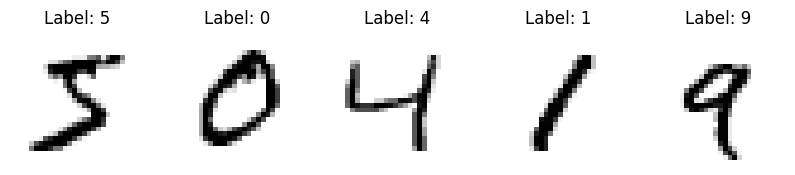

In [21]:
# Function to plot a single digit
def plot_digit(data, label):
    image = data.values.reshape(28, 28) # Reshape data to 28x28 array
    plt.imshow(image, cmap='gray_r')    # Plot the image in grayscale (with larger values being darker due to '_r')
    plt.title(f'Label: {label}')        # Display the label above the image
    plt.axis('off')                     # Hide the axes

# Plot the first 5 digits
images = df.drop('letter', axis=1)      # Drop the label column to get just the images. axis=1 means drop a column, while axis=0 means drop a row.
labels = df['letter']                   # Extract the labels (for plot titles)
plt.figure(figsize=(10, 2))             # Create a figure
for i in range(5):                      # Loop over the first 5 digit
    plt.subplot(1, 5, i + 1)            # Create a subplot for the current digit. 1 row, 5 cols, working in i+1'th subplot
    plot_digit(images.iloc[i], labels.iloc[i])  # Plot the i'th image
plt.show()